* * *
<pre> NYU Paris            <i> Artificial intelligence - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab 4: The monolayer perceptron </h1>

<pre align="left"> May 31st 2023               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Implement your first classifier
- Understand the concept of model complexity


Let's a generate a simple toy dataset.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.3, random_state=0)

labels = y.copy()
y[y==0] = -1

print("Shape of the data", X.shape)
print("labels:", y)

Shape of the data (100, 2)
labels: [ 1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1
  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1
 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1
  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1
  1  1 -1  1]


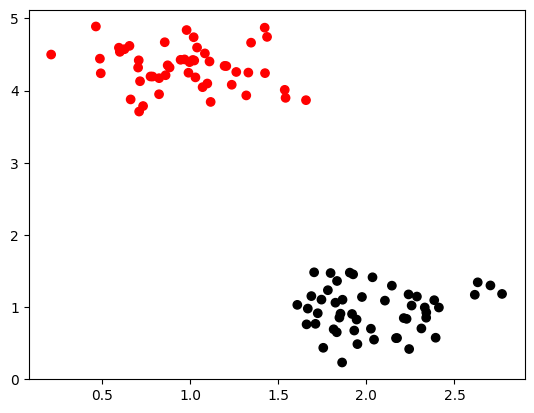

In [4]:

colors = ["red", "black"]
scatter_colors = np.array(colors)[labels]

plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=scatter_colors)
plt.show()

A monolayer perceptron is a geometric method that performs classification using a linear decision function of the form:
$$ f(x) = \langle w, x\rangle + \theta$$
or with a different notation:
$$ f(x) = w^\top x + \theta$$


### Question 1

Given a sample $x$, a prediction is then given by taking the sign of $f$:

$ prediction(x) = 1$ if $f(x) \geq 0$ and -1 if $f(x) < 0$.

Complete the function below that performs gradient descent to optimize the parameters $w$ and $\theta$.

The loss function that we minimize is:

$$L(w, \theta) = \sum_{i=1}^n \max(-y_i (x_i^\top w + \theta), 0)$$

Hint: Take a look at the lectures slides to refresh your memory on how to update the parameters

In [7]:
def plot(w, theta, X, ii):
    point0 = [0., 3.]
    point1 = [-theta / w[1], -(theta + w[0] * 3)/w[1]]

    colors = ["red", "black"]
    scatter_colors = np.array(colors)[labels]

    plt.figure()
    plt.plot(point0, point1)
    plt.scatter(X[:, 0], X[:, 1], color=scatter_colors)
    plt.scatter(X[ii, 0], X[ii, 1], color="gold")
    plt.show()
    
def gradient_descent(X, y, step_size=0.001, n_iter=100):
    n_samples, n_features = X.shape
    # do initialization
    w = np.zeros(n_features)
    theta = 0.
    for t in range(n_iter):
        for ii in range(n_samples):
            if y[ii] * (w.dot(X[ii]) + theta) <= 0:
                plot(w, theta, X, ii)
                w = w + step_size * y[ii] * X[ii]
                theta = theta + step_size * y[ii]
    plot(w, theta, X, ii)
    return w, theta

/var/folders/7j/_4cwcgyn5plc4qmvq87jv10m0000gn/T/ipykernel_14164/2304298198.py:3: RuntimeWarning: invalid value encountered in scalar divide
  point1 = [-theta / w[1], -(theta + w[0] * 3)/w[1]]


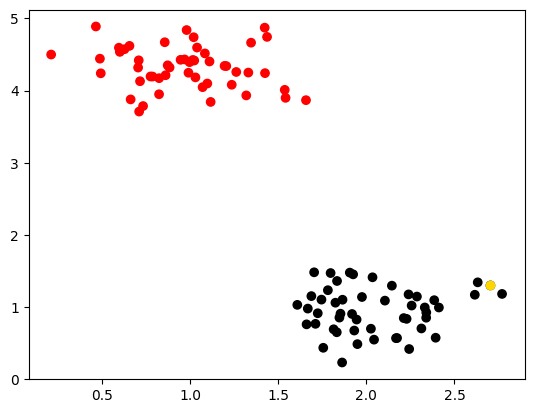

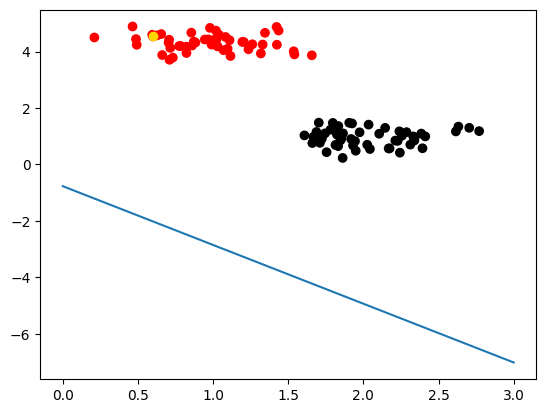

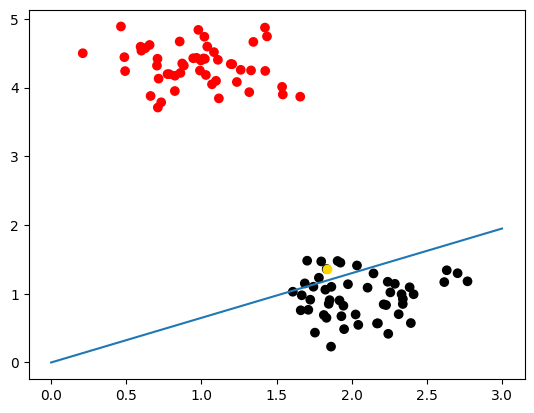

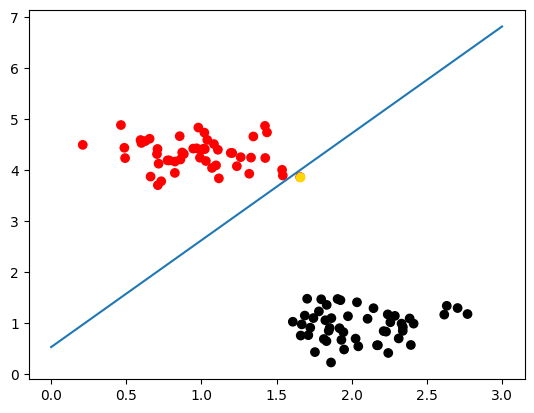

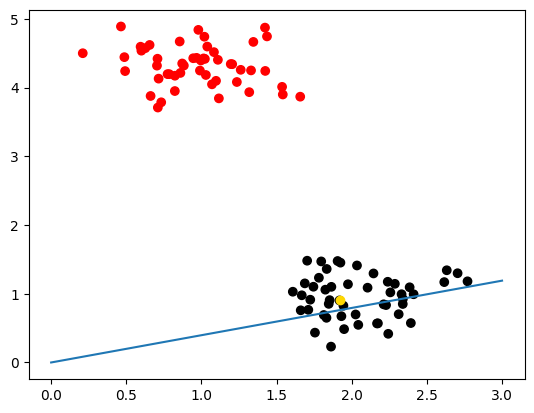

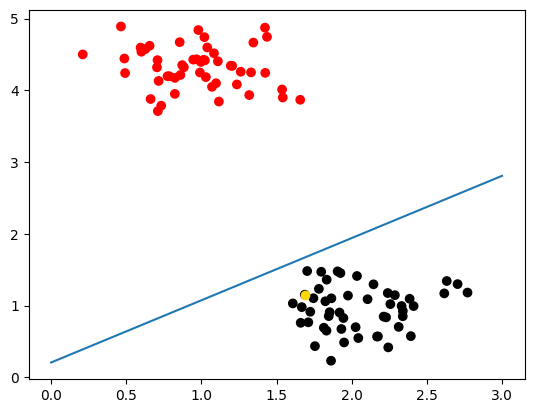

[ 0.00419862 -0.00484241] 0.001


In [8]:
w, theta = gradient_descent(X, y)
print(w, theta)

$ f(x) = w^\top x + \theta $ with $\theta \in \mathbb{R}$

$f(x) = \sum_{j=1}^d w_j x_j  + \theta$

### Question 2
The funciton $f$ is parametrized using one slope vector $w$ and the offset scalar $\theta$.
Can you think of a change of variable and change to the data X such that this parametrization is reduced to only one parameter $w$ to get a function of the form:

$$ f(x') = w'^\top x' = \sum_{j=1}^{d+1} w'_j x'_j = \sum_{j=1}^{d} w_j x_j +  \theta = f(x)$$ 

$w' = [w_1, ... w_d, \theta] $
$x' = [x_1, \dots, x_d, 1]$
### Question 3
Implement this change in your model and update the gradient descent function accordingly.

In [ ]:
X

In [81]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.3, random_state=0)
X = np.hstack((X, np.ones((X.shape[0], 1))))


labels = y.copy()
y[y==0] = -1

def gradient_descent(X, y, step_size=0.1, n_iter=100):
    n_samples, n_features = X.shape
    # do initialization
    w = np.zeros(n_features)
    for t in range(n_iter):
        for ii in range(n_samples):
            if y[ii] * (w.dot(X[ii])) <= 0:
                w = w + step_size * y[ii] * X[ii]
    return w, t

w = gradient_descent(X, y, 0.1)
w

(array([ 0.41986168, -0.48424146,  0.1       ]), 99)

In [82]:
w = gradient_descent(X, y, 1)
w

(array([ 4.19861676, -4.84241457,  1.        ]), 99)

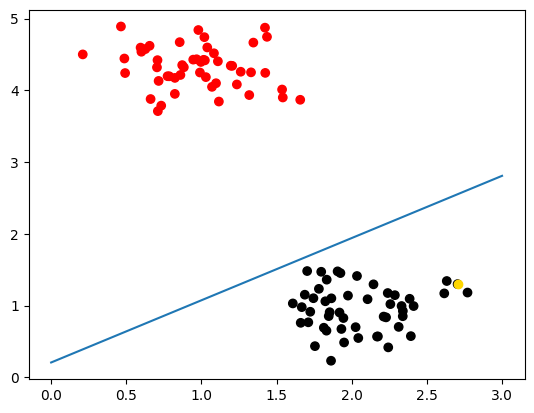

In [10]:
plot(w[:2], w[2], X[:, :2], 0)

### Question 4
Write a function that uses the learned parameters to make predictions.

In [20]:
def predict(x, w):
    return np.sign(x.dot(w))

In [24]:
predict(X, w)

array([ 1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
        1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.])

In [27]:
np.array([predict(xx, w) == yy  for (xx, yy) in zip(X, y)])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Question 5
Time to write a proper classifier object that following the sklearn API. We import the sklearn BaseEstimator model and customize it with our gradient descent function. Complete the following cell:

In [59]:
from sklearn.base import BaseEstimator

class Perceptron():
    def __init__(self, step_size=0.001, n_iter=1000):
        self.step_size = step_size
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w, self.n_iter_final = gradient_descent(X, y, self.step_size, self.n_iter)
        
    def predict(self, X):
        return np.sign(X.dot(self.w))
        
    def score(self, X, y):
        ypred = self.predict(X)
        s = (ypred == y).mean()
        return s

    def plot(self, X, y):
        point0 = [0., 3.]
        
        point1 = [-self.w[2] / self.w[1], -(self.w[2] + self.w[0] * 3)/self.w[1]]

        labels = y.copy()
        labels[y==-1] = 0
        colors = ["red", "black"]
        scatter_colors = np.array(colors)[labels]

        plt.figure()
        plt.plot(point0, point1)
        plt.scatter(X[:, 0], X[:, 1], color=scatter_colors)
        plt.show()

In [94]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.4, random_state=10)
X = np.hstack((X, np.ones((X.shape[0], 1))))

labels = y.copy()
y[y==0] = -1

mymodel = Perceptron(step_size=0.1, n_iter=100)
mymodel.fit(X, y)
mymodel.score(X, y)

array([0.30757092, 0.48583072, 0.1       ])

In [78]:
y

array([ 1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1])

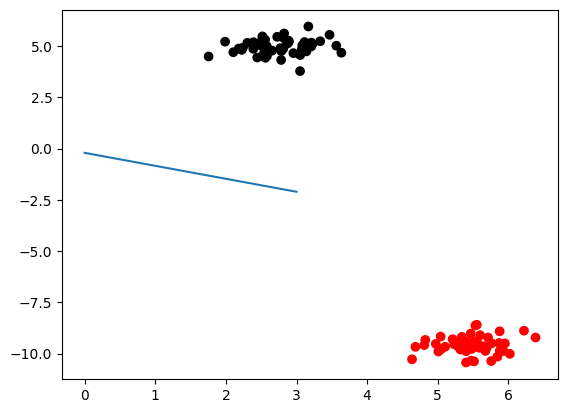

In [95]:
mymodel.plot(X, y)

In [62]:
mymodel.n_iter_final

99

In [57]:
print(mymodel)

### Apply the Perceptron model to data that you generated and try to break it

### Question 6
Time to properly evaluate our model. Divide the data into train-test.
Create an instance of your perceptron, train it on the data and compute a test accuracy score. 

Shape of the data (200, 3)
labels: [ 1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1
 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1
  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1
  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1
 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1
 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1
  1  1  1  1 -1 -1 -1 -1]


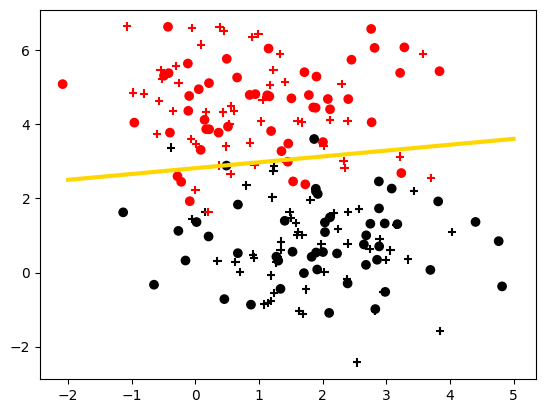

In [107]:
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=1.2, random_state=0)

X = np.hstack((X, np.ones((len(X), 1))))
labels = y.copy()
y[y==0] = -1

print("Shape of the data", X.shape)
print("labels:", y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

mymodel = Perceptron(step_size=0.01, n_iter=100)
mymodel.fit(X_train, y_train)
mymodel.score(X_test, y_test)
w = mymodel.w

point0 = [-2, 5.]
point1 = [-w[2] / w[1], -(w[2] + w[0] * 3)/w[1]]


scatter_colors_train = np.array(colors)[(y_train > 0).astype(int)]
scatter_colors_test = np.array(colors)[(y_test > 0).astype(int)]

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], color=scatter_colors_train)
plt.plot(point0, point1, lw=3, color="gold")
plt.scatter(X_test[:, 0], X_test[:, 1], color=scatter_colors_test, marker="+")
plt.show()

In [109]:
mymodel.score(X_train, y_train)

0.93

In [110]:
mymodel.score(X_test, y_test)

0.91

### Question 7:
Complete the code below to plot the accuracy curve for a list of `train_size`. What do you notice ?

In [111]:
train_sizes = np.linspace(0.1, 0.9, 20)

accuracies = []

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size)
    mymodel = Perceptron(step_size=0.01, n_iter=100)
    mymodel.fit(X_train, y_train)
    s = mymodel.score(X_test, y_test)
    accuracies.append(s)
accuracies

[0.9166666666666666,
 0.9244186046511628,
 0.8902439024390244,
 0.9354838709677419,
 0.9115646258503401,
 0.9202898550724637,
 0.8846153846153846,
 0.9180327868852459,
 0.9203539823008849,
 0.8761904761904762,
 0.90625,
 0.9204545454545454,
 0.9113924050632911,
 0.9014084507042254,
 0.9047619047619048,
 0.9444444444444444,
 0.8913043478260869,
 0.8918918918918919,
 0.9655172413793104,
 0.7]

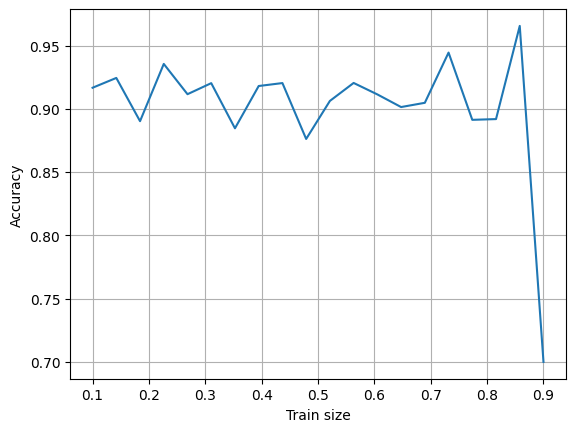

In [112]:
plt.figure()
plt.plot(train_sizes, accuracies)
plt.grid()
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.show()